---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Distributions in Pandas

In [1]:
import pandas as pd
import numpy as np

## Binomial Distribution

第一个参数是我们想 run 的次数，第二个参数是得到 0 的概率<br>
np.random.binomial 输出为多少次是 1<br>
如果有第三个参数意味着以前两个参数为一组，一共重复 n 次。<br>
如下：一共实行 15 组，每组实行 10 次 0/1 结果，每次得到 0 的概率为 0.5<br>

In [2]:
np.random.binomial(10, 0.5, 15)

array([3, 4, 4, 6, 5, 6, 6, 7, 3, 4, 2, 4, 4, 4, 6])

In [3]:
np.random.binomial(1000, 0.5)/1000

0.535

某地发生龙卷风的概率为 0.01%, 100000 次龙卷风，有多少次会发生在当地。

In [4]:
chance_of_tornado = 0.01/100
np.random.binomial(100000, chance_of_tornado)

10

模拟 1M 次龙卷风发生。Sampling Distribution

In [5]:
# 在一百万天理连续两天发生龙卷风的次数
chance_of_tornado = 0.01

tornado_events = np.random.binomial(1, chance_of_tornado, 1000000)
    
two_days_in_a_row = 0
for j in range(1,len(tornado_events)-1):
    if tornado_events[j]==1 and tornado_events[j-1]==1:
        two_days_in_a_row+=1

print('{} tornadoes back to back in {} years'.format(two_days_in_a_row, 1000000/365))

95 tornadoes back to back in 2739.72602739726 years


## Uniform Distribution

numpy.random.uniform(low=0.0, high=1.0, size=None)<br>

Output 为：在 uniform distribution 里随机取的数

In [6]:
np.random.uniform(0, 1, 10)

array([0.76987103, 0.96363774, 0.3939777 , 0.98191273, 0.98217591,
       0.77716212, 0.00564514, 0.10536054, 0.92097738, 0.06180463])

## Normal Distribution

numpy.random.normal(loc=0.0, scale=1.0, size=None)<br>
* loc : Mean (“centre”) of the distribution.
* scale : Standard deviation (spread or “width”) of the distribution.
* size : Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. If size is None (default), a single value is returned if loc and scale are both scalars. Otherwise, np.broadcast(loc, scale).size samples are drawn.

Output 为：在 normal distribution 里随机取的数

In [7]:
np.random.normal(0.75, size=10)

array([ 1.16848679, -0.35725201, -0.15355074,  0.15951085, -0.10320638,
       -0.71475168,  0.62631011,  1.01245122,  0.6886017 , -0.18199536])

Formula for standard deviation
$$\sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2}$$

In [8]:
distribution = np.random.normal(0.75,size=1000)

np.sqrt(np.sum((np.mean(distribution)-distribution)**2)/len(distribution))

1.0019974421108742

In [9]:
np.std(distribution)

1.0019974421108742

可以使用 Scipy 中的 kurtosis 来计算分布尾巴的形状。

负值表示 normal distribtuion 的曲线更平坦，正值表示曲线更陡。

In [10]:
import scipy.stats as stats
stats.kurtosis(distribution)

0.4495442578904312

也可以移动 normal distribution 的曲线，推动曲线的峰值向左或向右。This is called `skew`

In [11]:
stats.skew(distribution)

0.15614556289756998

<h2>Chi Squared Distribution</h2>

Chi Squared 分布只有一个参数：degree of freedom。<br>
degree of freedom 和从 normal population (标准样本)中，获取的样本数量密切相关。<br>
随着自由度增加，Chi Squared 分布形状发生变化：左偏斜开始向中心移动。

In [12]:
# 从 Chi Squared 分布中挑选 1000 个值且自由度为 2.
chi_squared_df2 = np.random.chisquare(2, size=10000)
stats.skew(chi_squared_df2)

2.1390895634299176

In [13]:
# 当自由度提升，skew 下降
chi_squared_df5 = np.random.chisquare(5, size=10000)
stats.skew(chi_squared_df5)

1.2555478337050152

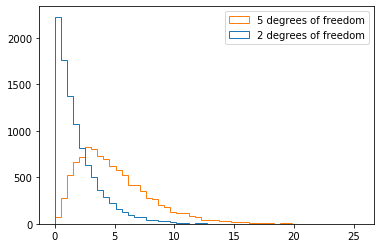

In [14]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

output = plt.hist([chi_squared_df2,chi_squared_df5], bins=50, histtype='step', 
                  label=['2 degrees of freedom','5 degrees of freedom'])
plt.legend(loc='upper right')


<h2> Modality Distribution</h2>

Modality Distribution has Multiple Peaks:
* Bimodal Distribution: 有 2 个 peaks (data mining 有很多)。可以用两个带有不同参数的 normal distribution 来合成产生(Gaussian Mixture Models)。在 clustering data 时很有用。

# Hypothesis Testing

Hypothesis: A statement we can test (两组假设互相对立)
* Alternative(对立) hypothesis: Our idea, e.g. there is a difference between groups
* Null hypothesis: The alternative of our idea, e.g. there is no difference between groups

检验 Null hypothesis 是否正确。如果能举出反例，则认定 Alternative hypothesis 是正确的。

在进行 Hypothesis Test 时，我们需选择一个 significance level 作为门槛，来表示多少概率的偶然性，我们愿意接受，超过这个偶然性，则考虑是否是常态，从而不接受假设结果。<br>

Critical Value alpha($\alpha$)： 
* The threshold as to how much chance you are willing to accept
* Typical values in social sciences are 0.1, 0.05, or 0.01


In [15]:
df = pd.read_csv('grades.csv')

In [16]:
df.head(2)

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000


In [17]:
len(df)

2315

In [18]:
early = df[df['assignment1_submission'] <= '2015-12-31']
late = df[df['assignment1_submission'] > '2015-12-31']

In [19]:
early.head(2)

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000


In [20]:
early.mean()

assignment1_grade    74.972741
assignment2_grade    67.252190
assignment3_grade    61.129050
assignment4_grade    54.157620
assignment5_grade    48.634643
assignment6_grade    43.838980
dtype: float64

In [21]:
late.mean()

assignment1_grade    74.017429
assignment2_grade    66.370822
assignment3_grade    60.023244
assignment4_grade    54.058138
assignment5_grade    48.599402
assignment6_grade    43.844384
dtype: float64

SciPy 库里包含了不同的统计测试，构成了 Python 中假设检定的基础。
* ttest 是比较两种不同种群的平均值的一种方法。ttest 返回结果是 t-statistic (测试统计量) 和 p 值 (p-value) 的 tuple。

In [22]:
from scipy import stats
stats.ttest_ind?

In [23]:
stats.ttest_ind(early['assignment1_grade'], late['assignment1_grade'])

Ttest_indResult(statistic=1.400549944897566, pvalue=0.16148283016060577)

In [24]:
stats.ttest_ind(early['assignment2_grade'], late['assignment2_grade'])

Ttest_indResult(statistic=1.3239868220912567, pvalue=0.18563824610067967)

In [25]:
stats.ttest_ind(early['assignment3_grade'], late['assignment3_grade'])

Ttest_indResult(statistic=1.7116160037010733, pvalue=0.08710151634155668)

上述 p-value 都大于 5 %,所以不能抛弃 Null hypothesis 假设。

<h5>P-hacking:</h5>

导致虚假的相关性，而非普遍性的结果。

* Doing many tests until you find one which is of statistical significance<br>
* At a confidence level of 0.05, we expect to find one positive result 1 time out of 20 tests<br>
* Remedies:
    * Bonferroni correction: 按照测试次数，紧缩 $\alpha$ 值。如第一次测试 $\alpha$ = 5%, 想运行 3 次测试，第二次 $\alpha$ = 5% * 1/3...
    * Hold-out sets: 多用于 Machine Learning - cross fold validation
    * Investigation pre-registration: 概述期望找到的内容及为什么，并描述测试，它将提供一个积极的证明。如将过程结果发给第三方。